In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

dataFrame = pd.read_csv("data.csv", names=("sex", "length", "diameter", "height", "whole weight", 
                        "shucked weight", "viscera weight", "shell weight", "rings"))

sex = dataFrame["sex"]
mNumber = 0
fNumber = 0
iNumber = 0
totalRows = sex.count()
for s in sex:
    if s == "M":
        mNumber += 1
    elif s == "F":
        fNumber += 1
    elif s == "I":
        iNumber += 1

mPercent = round(mNumber / totalRows * 100, 2) 
iPercent = round(iNumber / totalRows * 100, 2) 
fPercent = round(fNumber / totalRows * 100, 2) 

distributionData = {
    "Count": [mNumber, iNumber, fNumber] ,
    "%": [mPercent, iPercent, fPercent]

}

distDf = pd.DataFrame(distributionData, index=["Male", "Infant", "Female"])
display(distDf)

,Count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<AxesSubplot: title={'center': 'Occurrences of each category for the qualitative variable'}, xlabel='sex', ylabel='count'>

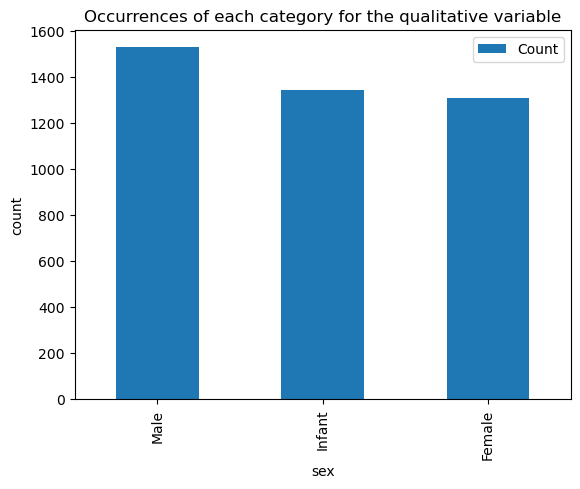

In [74]:
columns = dataFrame.columns[1:9]

summaryIndexes = ["mean", "std", "min", "25%", "50%", "75%", "max"]

summaryStatistics =  {index: [] for index in summaryIndexes}

for columnNumber in range(0, len(columns)):
    currColumn = dataFrame[columns[columnNumber]]
    summaryStatistics["mean"].append(currColumn.mean())
    summaryStatistics["std"].append(currColumn.std())
    summaryStatistics["min"].append(currColumn.min())
    summaryStatistics["25%"].append(currColumn.quantile(0.25))
    summaryStatistics["50%"].append(currColumn.quantile(0.5))
    summaryStatistics["75%"].append(currColumn.quantile(0.75))
    summaryStatistics["max"].append(currColumn.max())

summaryDf = pd.DataFrame(summaryStatistics, index=columns)
display(summaryDf)

distChart = distDf.plot.bar(y="Count", title="Occurrences of each category for the qualitative variable", 
                            ylabel="count", xlabel="sex")
display(distChart)


array([[<AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'diameter'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'whole weight'}>],
       [<AxesSubplot: title={'center': 'shucked weight'}>,
        <AxesSubplot: title={'center': 'viscera weight'}>,
        <AxesSubplot: title={'center': 'shell weight'}>,
        <AxesSubplot: title={'center': 'rings'}>]], dtype=object)

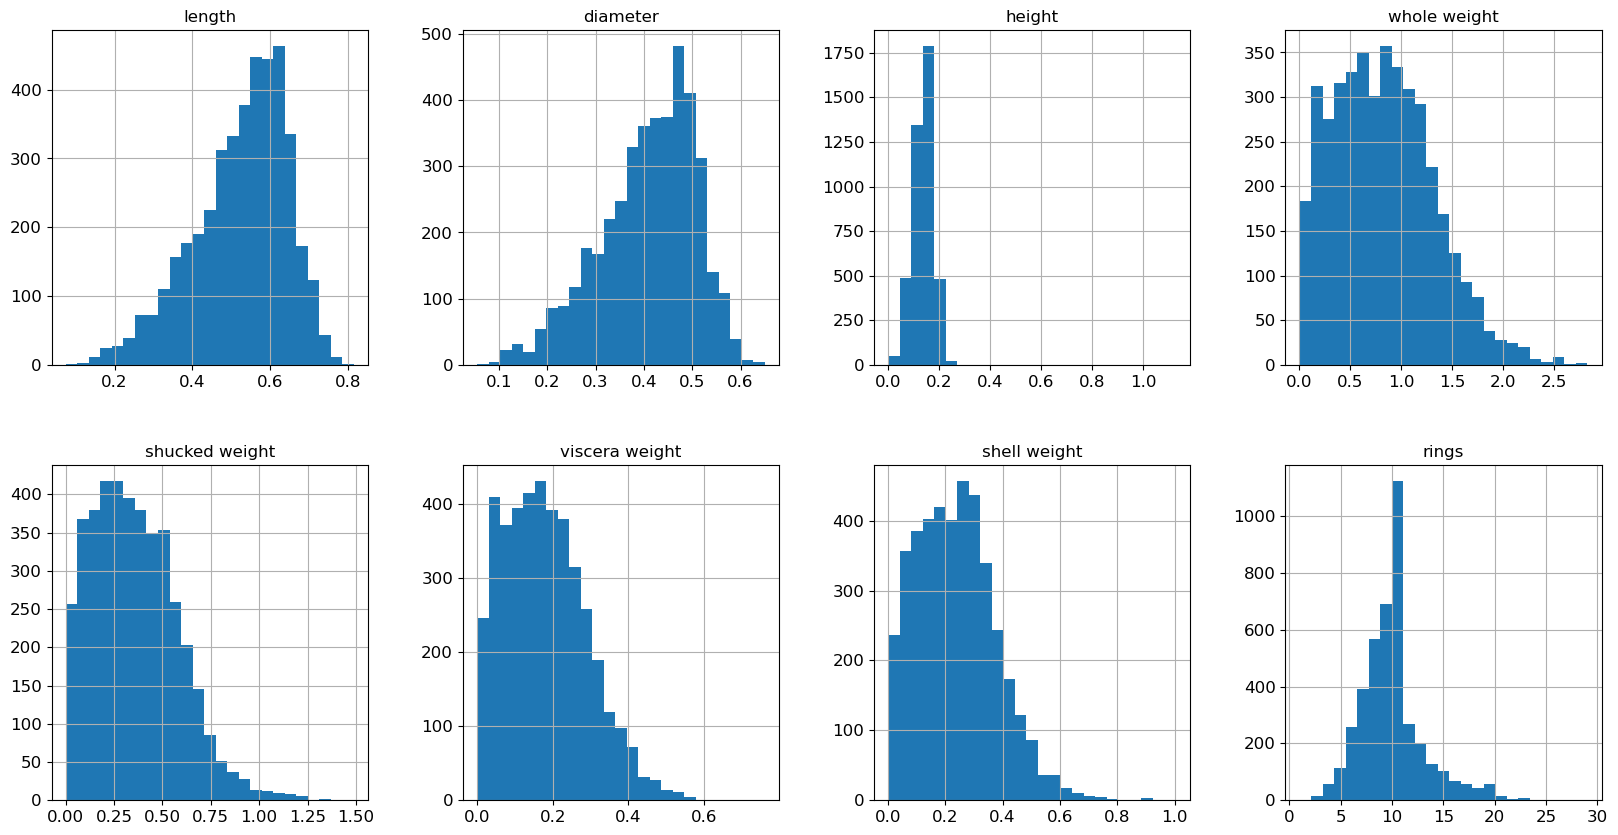

In [95]:


dfHist = dataFrame.hist(layout=(2, 4), figsize=(20, 10), xlabelsize=12, ylabelsize=12, bins=25)
display(dfHist)

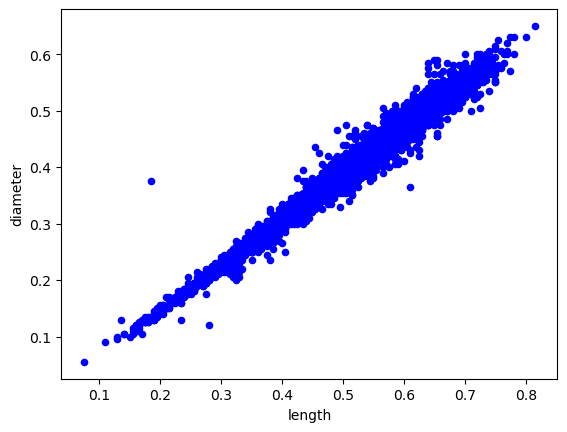

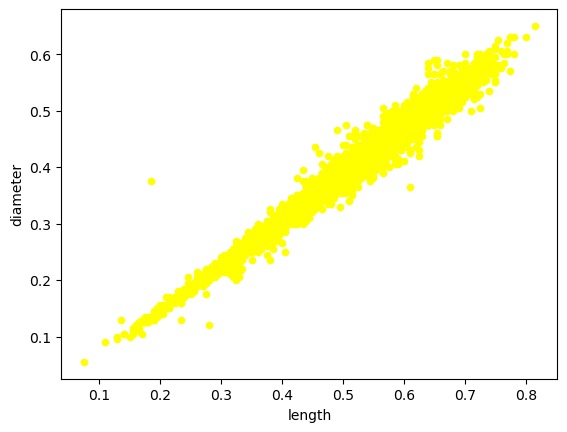

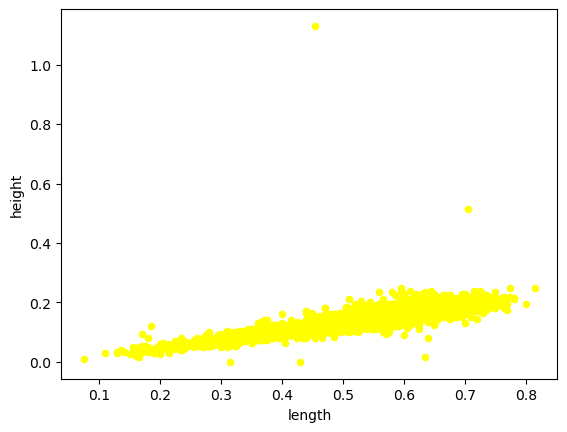

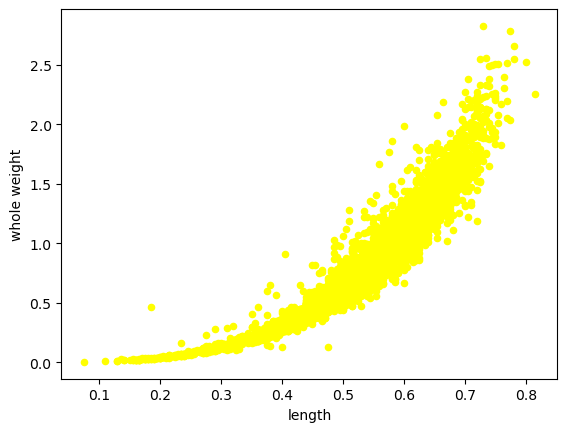

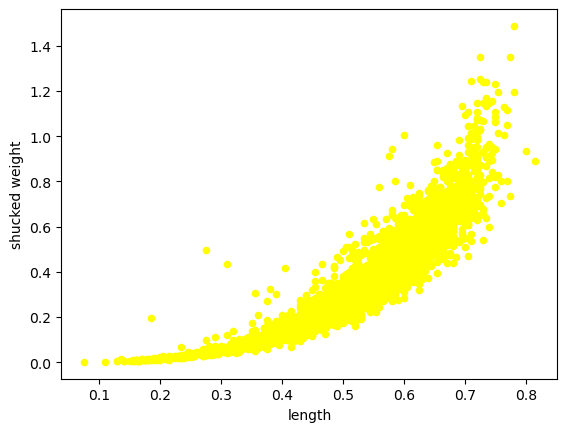

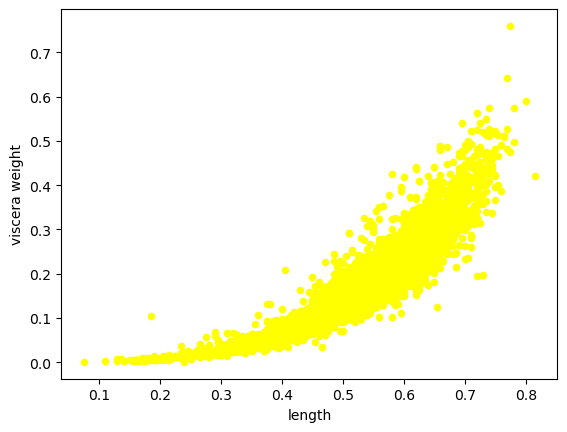

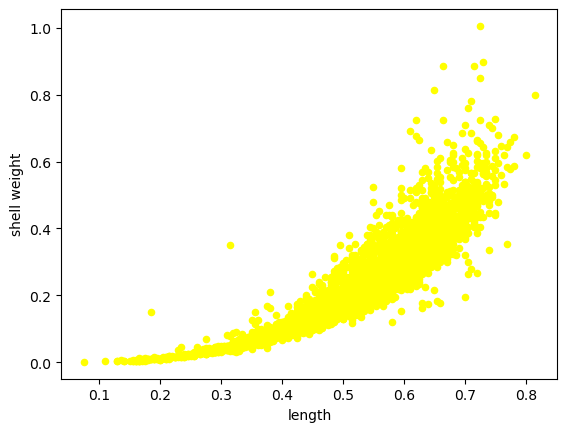

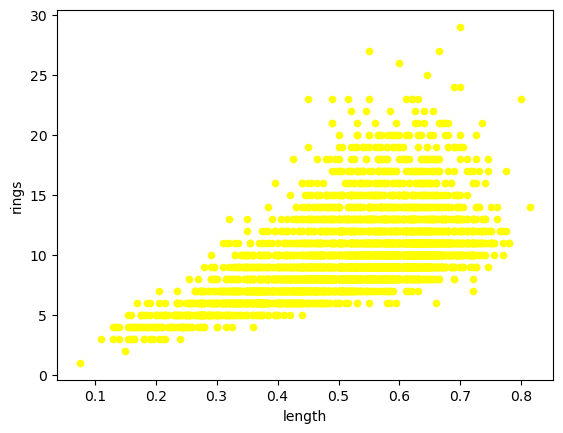

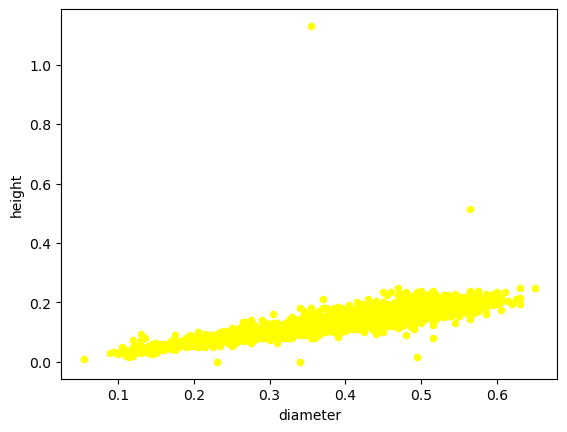

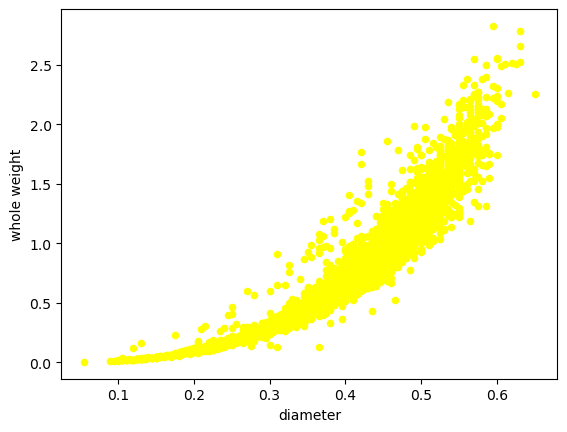

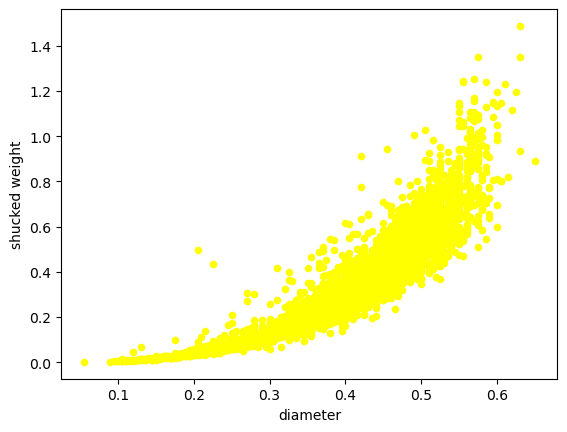

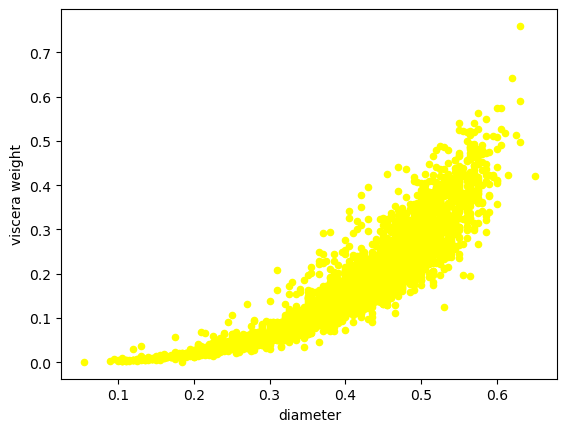

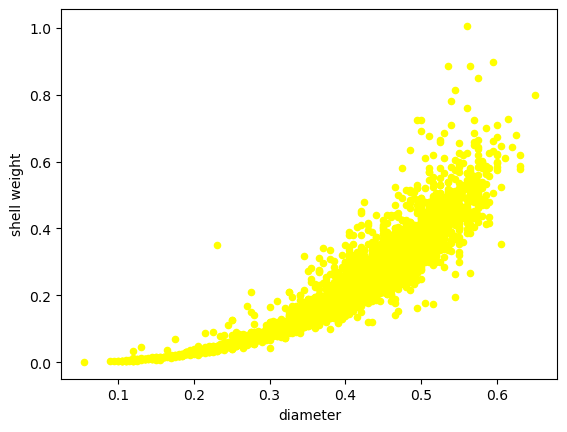

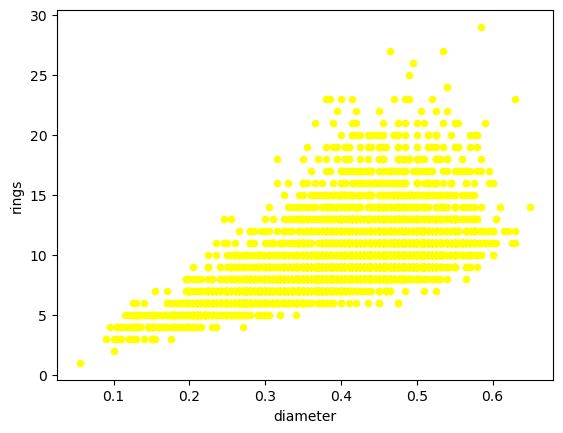

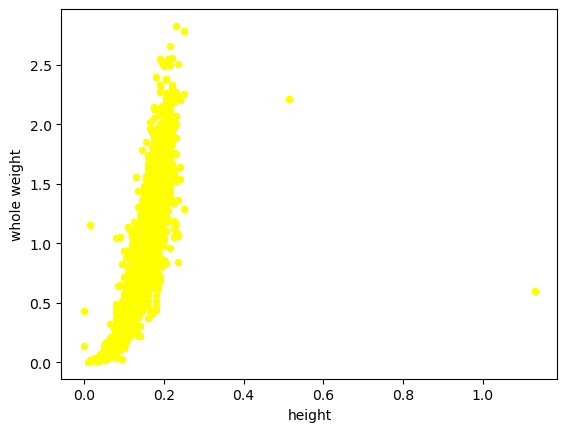

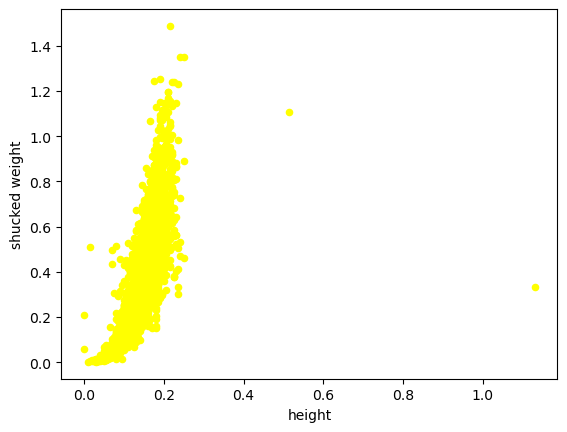

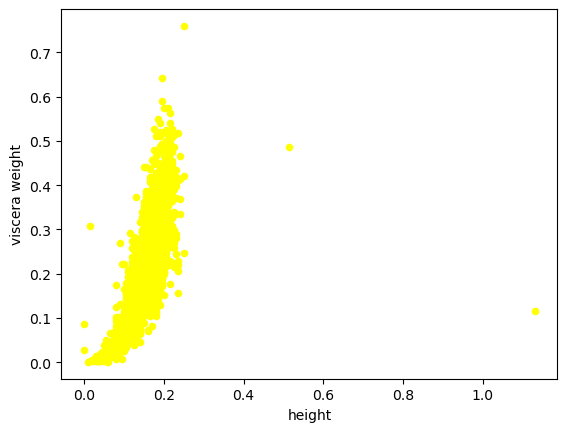

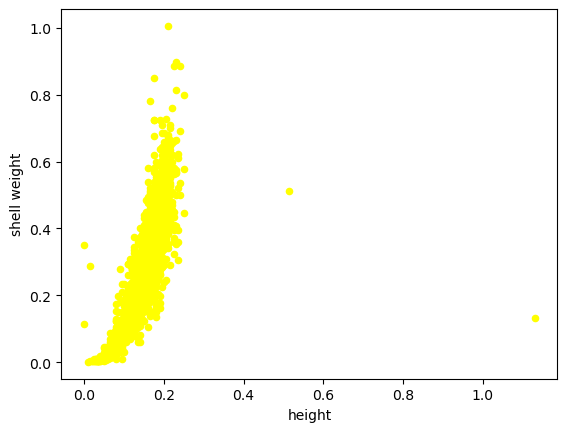

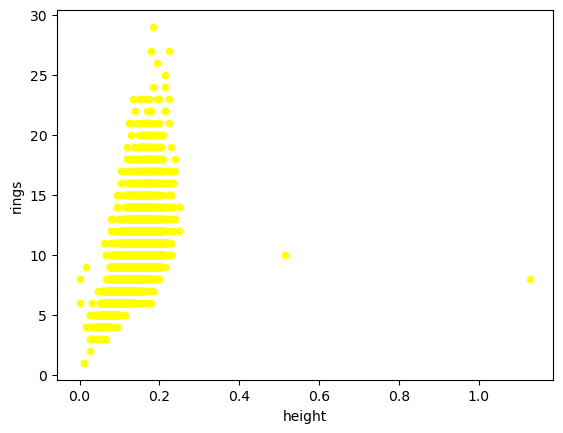

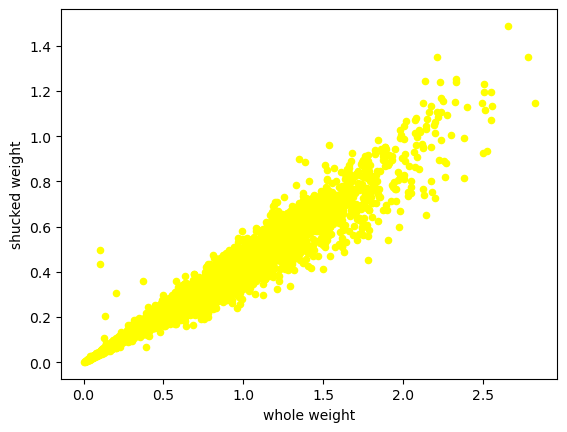

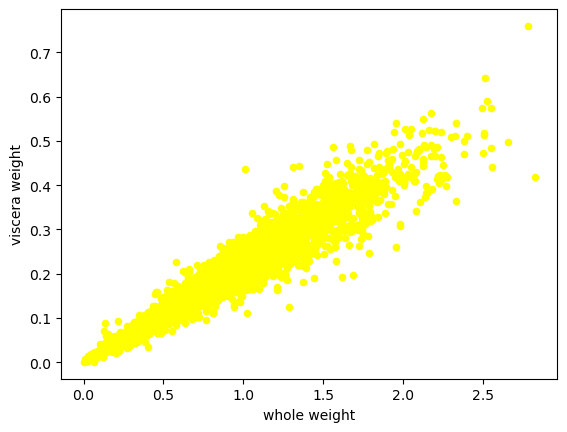

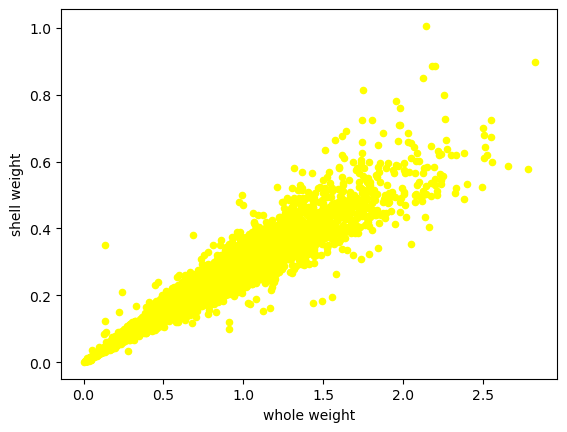

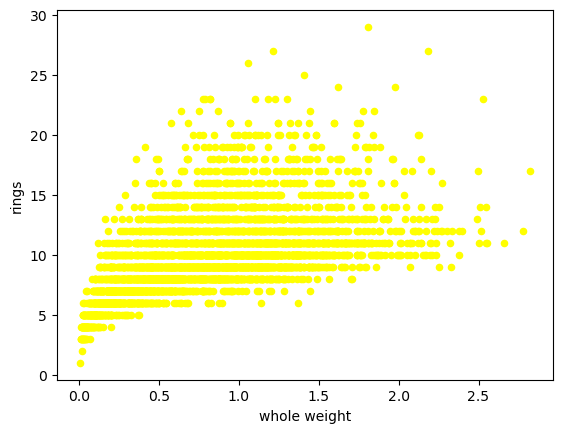

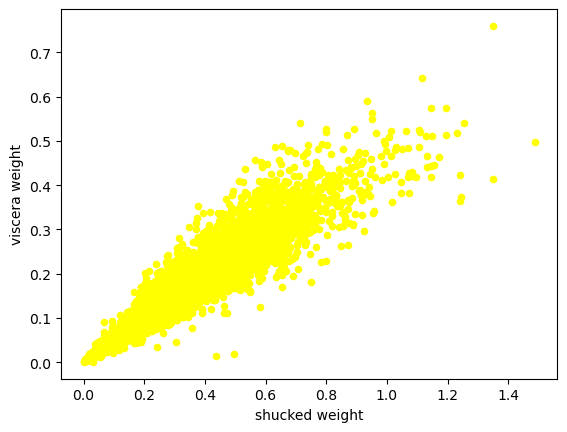

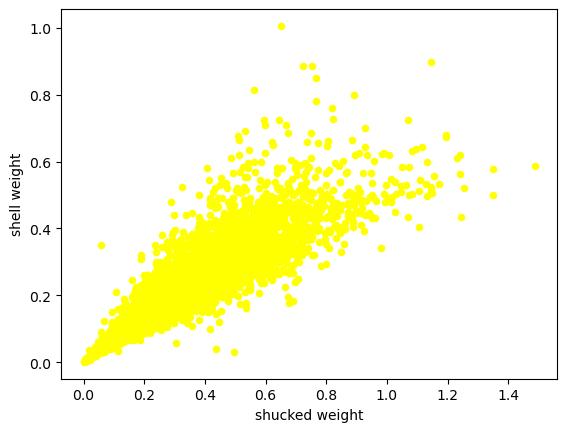

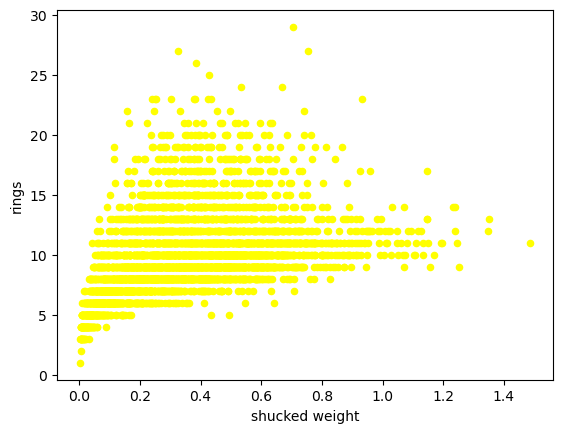

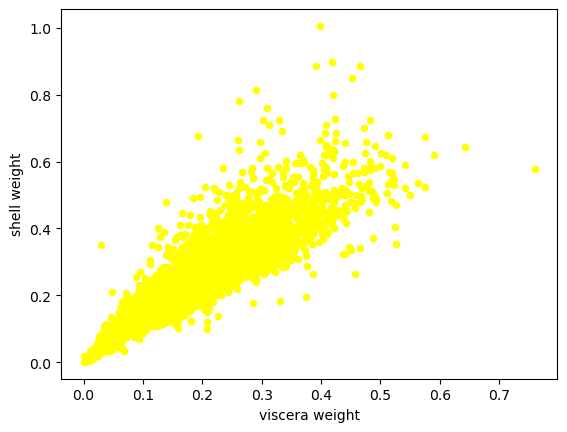

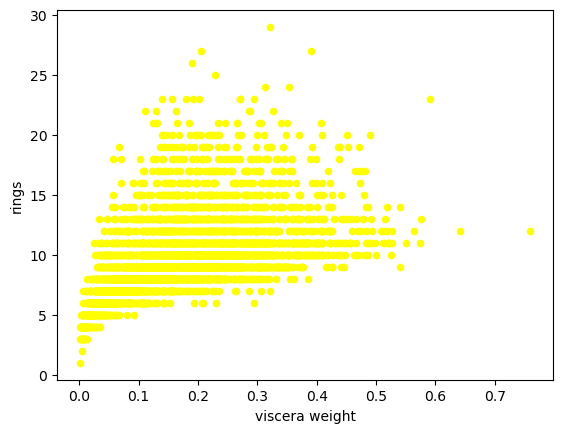

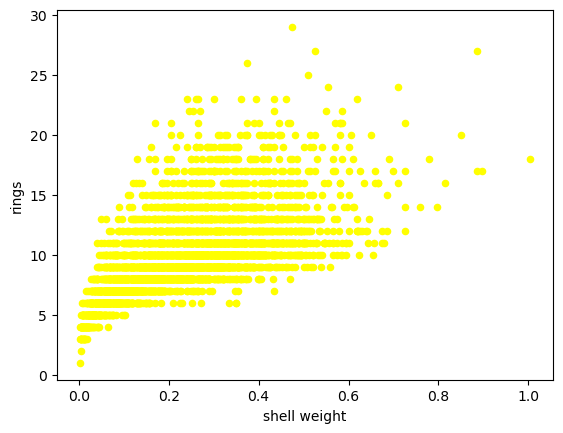

In [138]:
axes = []

axes.append(dataFrame.plot.scatter(x="length", y="diameter", c="blue"))

startColumn = 0
endColumn = len(columns) - 1

for currStartColumn in range(startColumn, endColumn):
    for currColumnNumber in range(currStartColumn + 1, len(columns)):
        axes.append(dataFrame.plot.scatter(x=columns[currStartColumn], y=columns[currColumnNumber], c="yellow", layout=(14, 2)))


    #for columnNumber in range(currStartColumn, len(columns) - 1):
    #    axes.append(dataFrame.plot.scatter(x=columns[currStartColumn], y=columns[currStartColumn + 1], c="red"))

#display(axes)